# Price Determinants of Boston Airbnb

In [114]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Load the Boston housing dataset
data = pd.read_csv('/Users/cemburakozyazar/Desktop/working directory/listings.csv')

In [115]:
pd.set_option('display.max_columns', None)
data.head(n=3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [116]:
# remove dollar sign and convert to float
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

In [117]:
# select relevant features
cols =  ['price','room_type','accommodates', 'bathrooms', 'bedrooms',
         'beds','host_is_superhost', 'number_of_reviews','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
         'review_scores_communication','review_scores_location','review_scores_value']
data = data[cols]

In [118]:
# change name column
data = data.rename(columns={'neighbourhood_cleansed': 'neighbourhood'})

In [119]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        3585 non-null   float64
 1   room_type                    3585 non-null   object 
 2   accommodates                 3585 non-null   int64  
 3   bathrooms                    3571 non-null   float64
 4   bedrooms                     3575 non-null   float64
 5   beds                         3576 non-null   float64
 6   host_is_superhost            3585 non-null   object 
 7   number_of_reviews            3585 non-null   int64  
 8   review_scores_accuracy       2762 non-null   float64
 9   review_scores_cleanliness    2767 non-null   float64
 10  review_scores_checkin        2765 non-null   float64
 11  review_scores_communication  2767 non-null   float64
 12  review_scores_location       2763 non-null   float64
 13  review_scores_valu

In [120]:
pd.set_option('display.max_columns', None)
data.head(n=5)

,price,room_type,accommodates,bathrooms,bedrooms,beds,host_is_superhost,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,250.0,Entire home/apt,4,1.5,2.0,3.0,f,0,NaN,NaN,NaN,NaN,NaN,NaN
1,65.0,Private room,2,1.0,1.0,1.0,f,36,10.0,9.0,10.0,10.0,9.0,9.0
2,65.0,Private room,2,1.0,1.0,1.0,t,41,10.0,9.0,10.0,10.0,9.0,10.0
3,75.0,Private room,4,1.0,1.0,2.0,f,1,10.0,10.0,10.0,10.0,10.0,10.0
4,79.0,Private room,2,1.5,1.0,2.0,t,29,10.0,10.0,10.0,10.0,9.0,10.0


Checking correlation of variables in order to avoid having highly correlated variables

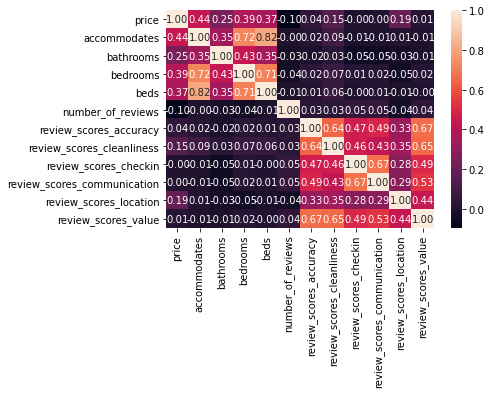

In [121]:
sns.heatmap(data.corr(), annot=True, fmt=".2f")

In [122]:
#since accommodates is highly correlated with number of bedroom and beds, these features will be eliminated

cols =  ['price','accommodates', 'bathrooms','host_is_superhost', 'number_of_reviews','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
         'review_scores_communication','review_scores_location','review_scores_value']
data = data[cols]

In [123]:
#since review scores are important signs of the listings to be selected, we'll drop the ones without review scores
df = data.dropna(subset=['review_scores_communication', 'review_scores_location','review_scores_value','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin'], how='any')

In [124]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2758 entries, 1 to 3583
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        2758 non-null   float64
 1   accommodates                 2758 non-null   int64  
 2   bathrooms                    2746 non-null   float64
 3   host_is_superhost            2758 non-null   object 
 4   number_of_reviews            2758 non-null   int64  
 5   review_scores_accuracy       2758 non-null   float64
 6   review_scores_cleanliness    2758 non-null   float64
 7   review_scores_checkin        2758 non-null   float64
 8   review_scores_communication  2758 non-null   float64
 9   review_scores_location       2758 non-null   float64
 10  review_scores_value          2758 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 258.6+ KB


In [125]:
df

,price,accommodates,bathrooms,host_is_superhost,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
1,65.0,2,1.0,f,36,10.0,9.0,10.0,10.0,9.0,9.0
2,65.0,2,1.0,t,41,10.0,9.0,10.0,10.0,9.0,10.0
3,75.0,4,1.0,f,1,10.0,10.0,10.0,10.0,10.0,10.0
4,79.0,2,1.5,t,29,10.0,10.0,10.0,10.0,9.0,10.0
5,75.0,2,1.0,t,8,10.0,10.0,10.0,10.0,9.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
3574,68.0,1,1.0,f,1,8.0,8.0,8.0,6.0,10.0,8.0
3575,69.0,2,1.0,f,6,8.0,7.0,9.0,10.0,8.0,7.0
3578,85.0,1,1.0,f,2,10.0,10.0,10.0,10.0,10.0,10.0
3580,69.0,3,1.0,f,4,10.0,10.0,10.0,10.0,8.0,9.0


In [126]:
# remove dollar sign and convert to float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

<ipython-input-126-60f382677125>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


In [127]:
#converting superhost into dummies
df['host_is_superhost'] = (df['host_is_superhost'] == 't').astype(int)

<ipython-input-127-53f087818869>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_is_superhost'] = (df['host_is_superhost'] == 't').astype(int)


In [128]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2758 entries, 1 to 3583
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        2758 non-null   float64
 1   accommodates                 2758 non-null   int64  
 2   bathrooms                    2746 non-null   float64
 3   host_is_superhost            2758 non-null   int64  
 4   number_of_reviews            2758 non-null   int64  
 5   review_scores_accuracy       2758 non-null   float64
 6   review_scores_cleanliness    2758 non-null   float64
 7   review_scores_checkin        2758 non-null   float64
 8   review_scores_communication  2758 non-null   float64
 9   review_scores_location       2758 non-null   float64
 10  review_scores_value          2758 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 258.6 KB


In [129]:
#will eliminate 12 listings with no bathroom info and 2 without the property type
df = df.dropna(subset=['bathrooms'], how='any')

In [130]:
df.describe()

,price,accommodates,bathrooms,host_is_superhost,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000
mean,166.906773,3.067735,1.215950,0.143117,24.554625,9.434086,9.262564,9.648216,9.651129,9.417698,9.170794
std,113.200771,1.826281,0.500434,0.350256,38.523866,0.930082,1.165642,0.762552,0.730741,0.896441,1.009048
min,11.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000
25%,85.000000,2.000000,1.000000,0.000000,3.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
50%,145.000000,2.000000,1.000000,0.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
75%,215.000000,4.000000,1.000000,0.000000,29.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,1300.000000,16.000000,6.000000,1.000000,404.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [131]:
df['price'].quantile(0.05)


50.0

In [132]:
df['price'].quantile(0.95)

363.0

In [133]:
#getting rid of values below 5% and above 95%
df = df[df['price']>50]
df = df[df['price']<375]

# Linear Regression

RMSE test set: 61.538
The r-squared score for your model was 0.37554832877465183 .


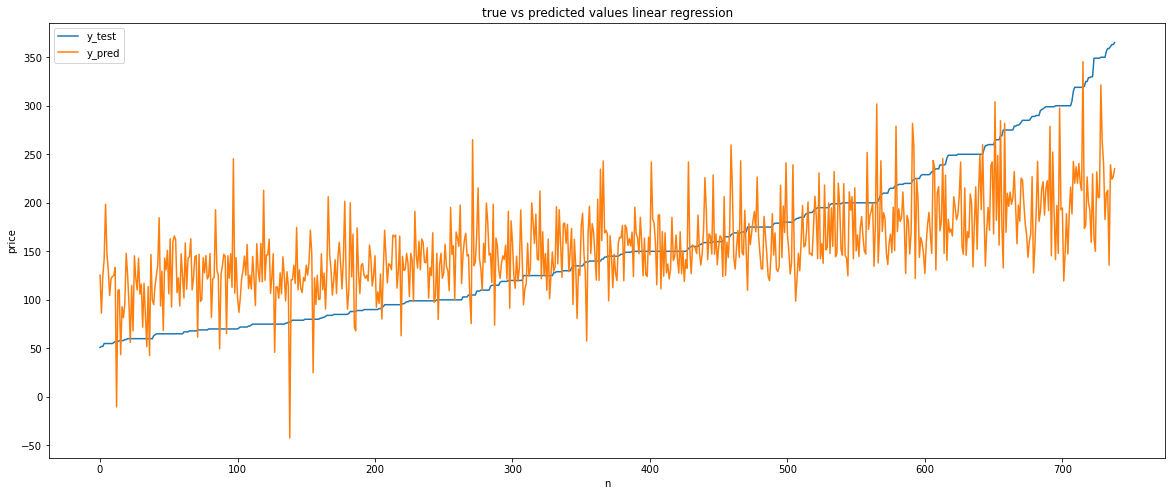

In [142]:
# prepare y and X
y = df['price']
X = df.drop('price', axis=1)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# create the model, fit and predict
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared 
rsquared_score = r2_score(y_test, y_test_preds)
# evaluate test set
mse_test = mean_squared_error(y_test,  y_test_preds)
rmse_test = np.sqrt(mse_test)
print('RMSE test set:', round(rmse_test,3))

print("The r-squared score for your model was {} .".format(rsquared_score))


# prepare data for plot
d = {'y_test': y_test.values, 'y_pred': y_test_preds}
df2 = pd.DataFrame(d)
df2 = df2.sort_values('y_test')
df2 = df2.reset_index(drop=True)

# plot true (test) vs predicted values
df2.plot(figsize=(20,8))

plt.ylabel('price')
plt.xlabel('n')
plt.title('true vs predicted values linear regression')
plt.show()



# Random Forest

RMSE test set: 61.484


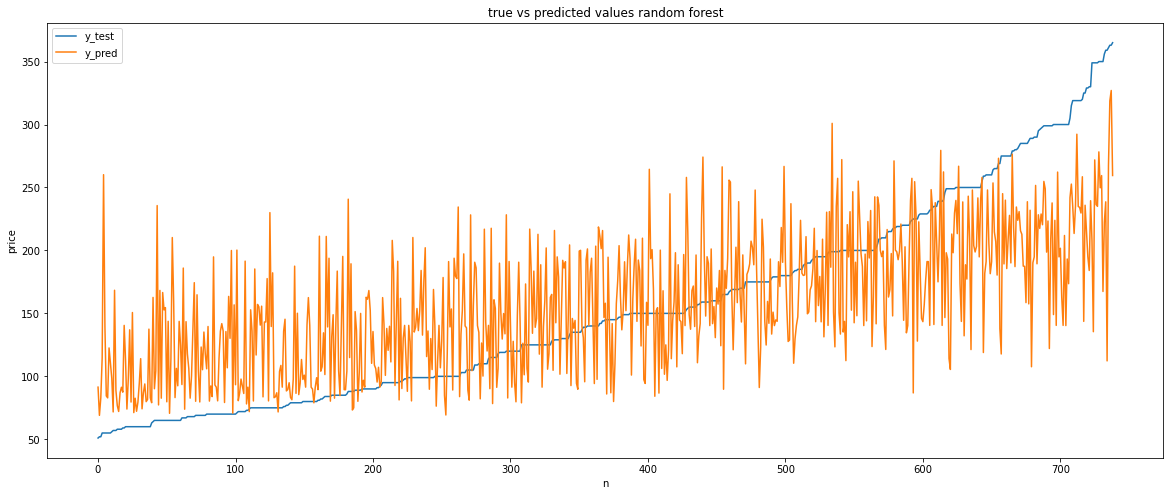

In [136]:
# prepare y and X
y = df['price']
X = df.drop('price', axis=1)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


# create the model, fit and predict
rf = RandomForestRegressor(n_estimators = 500, max_depth = 10, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# evaluate test set
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
print('RMSE test set:', round(rmse_test,3))

# prepare data for plot
d = {'y_test': y_test.values, 'y_pred': y_pred}
df2 = pd.DataFrame(d)
df2 = df2.sort_values('y_test')
df2 = df2.reset_index(drop=True)

# plot true (test) vs predicted values
df2.plot(figsize=(20,8))

plt.ylabel('price')
plt.xlabel('n')
plt.title('true vs predicted values random forest')
plt.show()

In [144]:
feature_importances = pd.DataFrame(rf.feature_importances_, index =X.columns,  
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(n=10)


,importance
accommodates,0.427318
number_of_reviews,0.191068
review_scores_location,0.086691
bathrooms,0.064957
review_scores_cleanliness,0.062268
review_scores_value,0.041339
review_scores_accuracy,0.041017
review_scores_checkin,0.037002
review_scores_communication,0.034364
host_is_superhost,0.013976


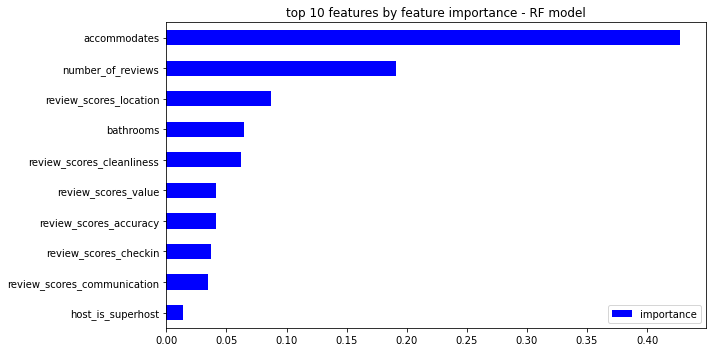

In [147]:
feature_importances.sort_values(by='importance', ascending=True).tail(20).plot.barh(color='b', figsize=(10,5))
plt.title('top 10 features by feature importance - RF model')
plt.tight_layout()
plt.show()